
# Project: Investigate FBI Gun Data & Census Data (2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Gun Data Analysis 

**It is a known fact that gun data is very scarse and not of high quality, due to being under funded by the government. This data exploration project will attempt to demonstrate different patterns within the variables in order to gain insights, and answer the question presented below.**
- Do states with higher rates of median household income have a higher rate of permits issued?
- Do states with higher rates of foreigners have a higher rate of permits issued?
- Do states with higher rates of foreigners and higher median household incomes, have a higher amount of permits issued?
- Do states with higher median household incomes, have a higher amount of handguns and long guns? 

<a id='wrangling'></a>
## Data Wrangling

> I will begin by importing the necessary packages as specified below, and will comment the cells as I continue the data cleaning process to explain the steps taken.

>The information is stored in "US_census_data.csv" and "gun_data.xlsx".
[Click here for data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip&sa=D&ust=1527826261101000)


### General Properties

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

In [2]:
df_census_data = pd.read_csv('US_census_data.csv')
df_census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
df_census_data.drop(['Fact Note'],1, inplace=True) #dropping the Fact Note column because its mostly null values, inplace=True is to perform and save changes.

In [4]:
df_census_data.dropna(inplace=True) #Here I'm dropping all the rows that have nulls as they offer no usable data, and represent just one data point per state.

In [5]:
np.array(df_census_data['Fact']) #to locate the names of the rows I'd like to keep.

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [6]:
df_census_data.head() #to check that everything is working as expected

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
#The only rows I would like to keep are the foreign born, median household income and population estimates rows which will become my columns.
df_1 = df_census_data.query('Fact == "Median household income (in 2015 dollars), 2011-2015" | Fact == "Foreign born persons, percent, 2011-2015" | Fact == "Population estimates, July 1, 2016,  (V2016)"')


In [8]:
###I'm reassigning the original variable for easier handling goin forward as well as transposing the rows with the columns.
df_1.set_index('Fact',inplace=True)
df_1 = df_1.T

In [9]:
df_1 = df_1.reset_index() #reseting the index for dataframe functionality

In [10]:
df_1.head() #new check to make sure the code is working as expected

Fact,index,"Population estimates, July 1, 2016, (V2016)","Foreign born persons, percent, 2011-2015","Median household income (in 2015 dollars), 2011-2015"
0,Alabama,"4,863,300",3.50%,"$43,623"
1,Alaska,"741,894",7.40%,"$72,515"
2,Arizona,"6,931,071",13.50%,"$50,255"
3,Arkansas,"2,988,248",4.70%,"$41,371"
4,California,"39,250,017",27.00%,"$61,818"


In [11]:
df_1.columns.name = None #since I set fact to index it shows as the columns name, I want it to be None.

In [12]:
df_1.columns = ['state', 'population_estimates', 'foreign_born_percent', 'median_household_income'] #renaming the columns for easier data manipulation

In [13]:
df_1.head() # check behavior is as expected

,state,population_estimates,foreign_born_percent,median_household_income
0,Alabama,"4,863,300",3.50%,"$43,623"
1,Alaska,"741,894",7.40%,"$72,515"
2,Arizona,"6,931,071",13.50%,"$50,255"
3,Arkansas,"2,988,248",4.70%,"$41,371"
4,California,"39,250,017",27.00%,"$61,818"


In [14]:
df_1.info() # this tells me that there are incosistencies within the columns, in the step below I will change all the datatypes to floats for use with arithmetic vectorized operations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
state                      50 non-null object
population_estimates       50 non-null object
foreign_born_percent       50 non-null object
median_household_income    50 non-null object
dtypes: object(4)
memory usage: 1.6+ KB


In [15]:
#I will reassign the columns so I can save the changes made on the left side of the = sign.
df_1['population_estimates'] = df_1['population_estimates'].apply(lambda x: x.replace(',', '')).astype('float')
df_1['foreign_born_percent'] = df_1['foreign_born_percent'].apply(lambda x: float(x.replace('%', ''))/100 if x[-1] == '%' else float(x))
df_1['median_household_income'] = df_1['median_household_income'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [16]:
df_1.head() #data is finally clean, it seems that all the data types have been !!!

,state,population_estimates,foreign_born_percent,median_household_income
0,Alabama,4863300.0,0.035,43623.0
1,Alaska,741894.0,0.074,72515.0
2,Arizona,6931071.0,0.135,50255.0
3,Arkansas,2988248.0,0.047,41371.0
4,California,39250017.0,0.270,61818.0


In [17]:
df_1.describe(percentiles=[.05,.095]) #again this tells me that my data is of the same types and im ready to start

,population_estimates,foreign_born_percent,median_household_income
count,5.000000e+01,50.000000,50.000000
mean,6.448927e+06,0.089620,54311.860000
std,7.271769e+06,0.060841,8949.529115
min,5.855010e+05,0.015000,39665.000000
5%,7.491201e+05,0.026150,42593.400000
9.5%,9.221842e+05,0.033310,44541.065000
50%,4.559320e+06,0.067500,52601.000000
max,3.925002e+07,0.270000,74551.000000


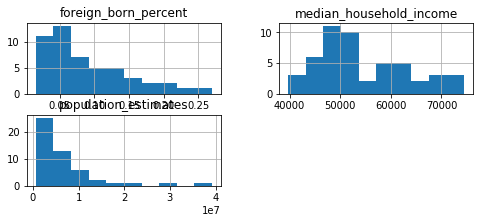

In [18]:
df_1.hist(figsize=(8,3)); #checking how my variables are distributed

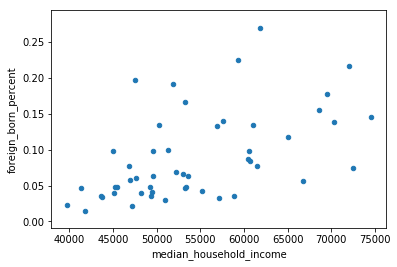

In [19]:
df_1.plot.scatter('median_household_income', 'foreign_born_percent'); #This shows that as the percentage of foreign borns increases the median household income also increases.

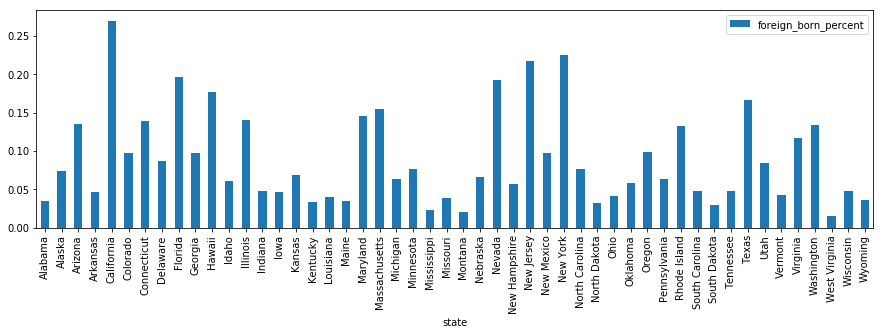

In [20]:
df_1.plot.bar(y = 'foreign_born_percent', x = 'state', figsize=(15,4)); #this gives us an idea of the percentage of foreign born people per state

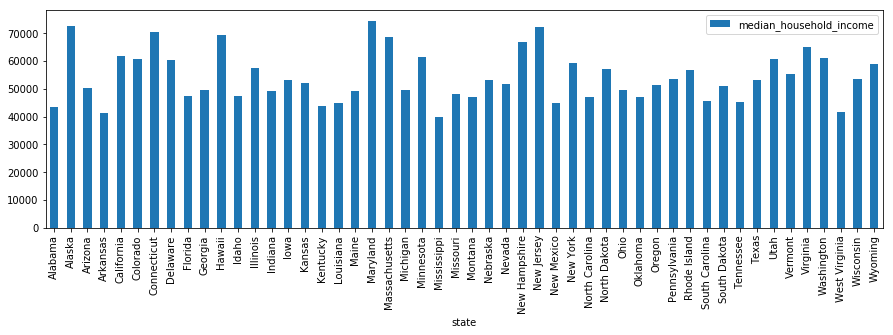

In [21]:
df_1.plot.bar(y = 'median_household_income', x = 'state', figsize=(15,4)); #this gives us an idea of the percentage of foreign born people per state

In [22]:
df_1.query('population_estimates == 0')

,state,population_estimates,foreign_born_percent,median_household_income


In [23]:
df_gun = pd.read_excel('gun_data.xlsx') #now is time for our second data set

In [24]:
df_2 = df_gun #I'm reassigning the original variable for easier handling goin forward(this is debatable, since gun is a short name, im doing it for consistency)
df_2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [25]:
df_2[df_2['month'].str.contains('2016')].shape

(660, 27)

In [26]:
df_2 = df_2[df_2['month'].str.contains('2016')] #Im interested in the 2016 data since the data in the census is from 2016 as well.

In [27]:
df_2.head() #Now I am left with the data for just 2016

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,2016-12,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,2016-12,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,2016-12,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,2016-12,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,2016-12,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161


In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 495 to 1154
Data columns (total 27 columns):
month                        660 non-null object
state                        660 non-null object
permit                       660 non-null float64
permit_recheck               605 non-null float64
handgun                      660 non-null float64
long_gun                     660 non-null float64
other                        660 non-null float64
multiple                     660 non-null int64
admin                        660 non-null float64
prepawn_handgun              660 non-null float64
prepawn_long_gun             660 non-null float64
prepawn_other                660 non-null float64
redemption_handgun           660 non-null float64
redemption_long_gun          660 non-null float64
redemption_other             660 non-null float64
returned_handgun             660 non-null float64
returned_long_gun            660 non-null float64
returned_other               660 non-null floa

In [29]:
df_2 = df_2.groupby(['state']).agg({'permit':'mean', 'handgun':'mean', 'long_gun':'mean'}) #used to aggregate the data per state since thats the information we have for the census data

In [30]:
df_2.head() #I see that my index has become the state names, I would like to assign it an index before I move forward

,permit,handgun,long_gun
state,,,
Alabama,24253.250000,12760.250000,10163.583333
Alaska,260.083333,3124.250000,3073.916667
Arizona,7314.250000,13898.666667,9082.333333
Arkansas,4621.333333,6687.000000,6843.333333
California,86415.083333,46696.250000,46212.500000


In [31]:
df_2.reset_index(inplace=True) #here im reseting the index, inplace=True which means that the operation will be performed, and it will change the df_2 permanently.

In [32]:
# lets do a quick check and some data plotting.
df_2.head()

,state,permit,handgun,long_gun
0,Alabama,24253.250000,12760.250000,10163.583333
1,Alaska,260.083333,3124.250000,3073.916667
2,Arizona,7314.250000,13898.666667,9082.333333
3,Arkansas,4621.333333,6687.000000,6843.333333
4,California,86415.083333,46696.250000,46212.500000


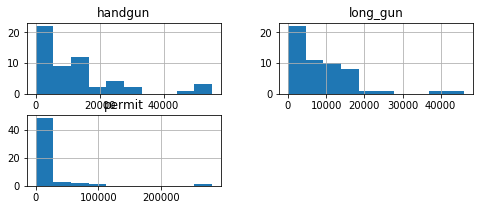

In [33]:
df_2.hist(figsize=(8,3));

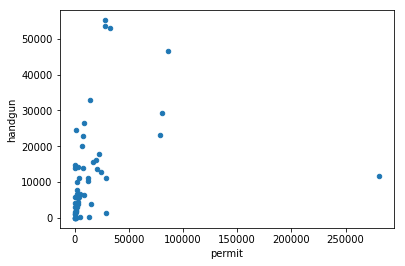

In [34]:
df_2.plot.scatter('permit', 'handgun'); #this shows that there is no real relation between these variables.

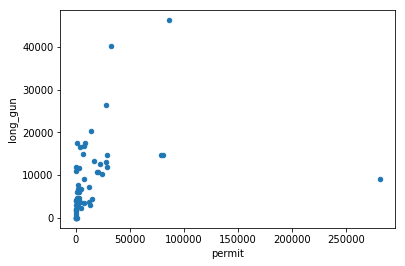

In [35]:
df_2.plot.scatter('permit', 'long_gun');

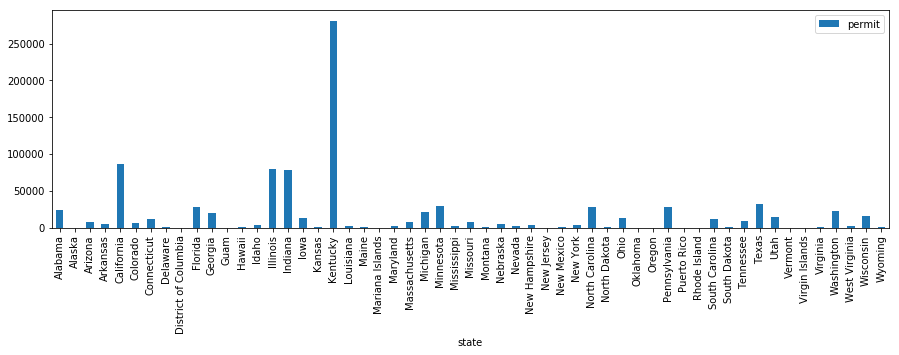

In [36]:
df_2.plot.bar(y = 'permit', x = 'state', figsize=(15,4)); #this and the bar chart below confirm what the scatter plot shows

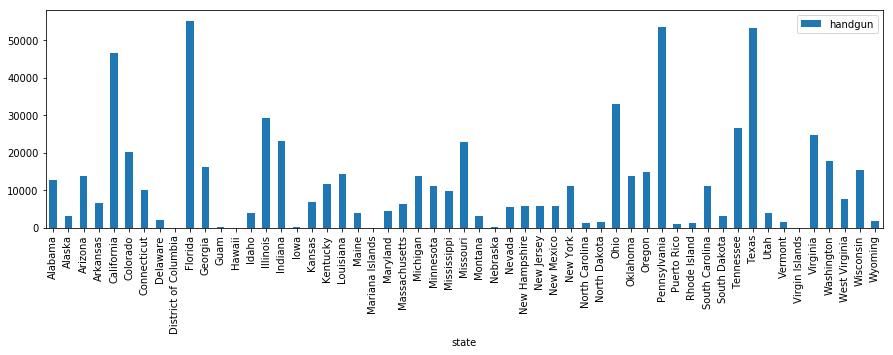

In [37]:
df_2.plot.bar(y = 'handgun', x = 'state', figsize=(15,4));

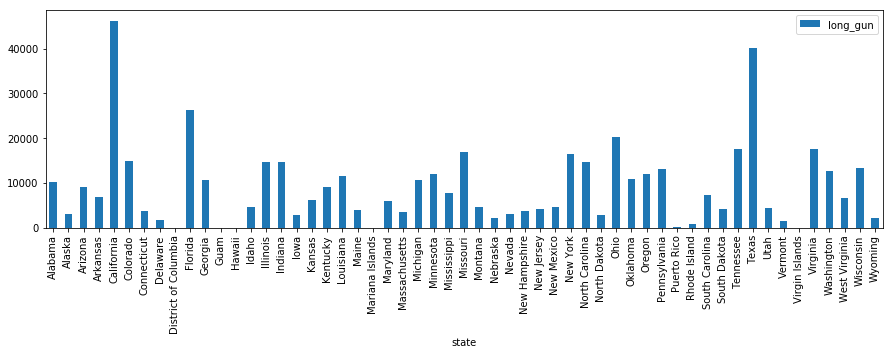

In [38]:
df_2.plot.bar(y = 'long_gun', x = 'state', figsize=(15,4));

In [39]:
#Lets check on df_1 for the census data
df_1.head()

,state,population_estimates,foreign_born_percent,median_household_income
0,Alabama,4863300.0,0.035,43623.0
1,Alaska,741894.0,0.074,72515.0
2,Arizona,6931071.0,0.135,50255.0
3,Arkansas,2988248.0,0.047,41371.0
4,California,39250017.0,0.270,61818.0


In [40]:
#now lets do a quick check on df_2 for the gun data, they both look good at first glance.
df_2.tail()

,state,permit,handgun,long_gun
50,Virginia,818.083333,24663.583333,17497.916667
51,Washington,22356.166667,17842.166667,12585.750000
52,West Virginia,2233.833333,7677.000000,6758.750000
53,Wisconsin,16619.250000,15525.000000,13315.333333
54,Wyoming,661.500000,1880.750000,2151.250000


In [41]:
df_1.info() #Okay looks like the heavy lifting is over for df_1
df_1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
state                      50 non-null object
population_estimates       50 non-null float64
foreign_born_percent       50 non-null float64
median_household_income    50 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


(50, 4)

In [42]:
#It looks like these are both already in float form, thus there is nothing further that needs to be done in terms of data integrity
#our data looks clean now
df_2.info()
df_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
state       55 non-null object
permit      55 non-null float64
handgun     55 non-null float64
long_gun    55 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


(55, 4)

>**Now, I see the shapes do not match because one has more states than the other. I have some options, I could find out by reading the names on the state column and see if they match, or even better I could simply drop the rows which do not match on the "state" column when I merge the dataframes.** 

### Merging dataframes in order to see what other observations can be made from the data.

In [43]:
df_3 = pd.merge(df_1, df_2, how='inner', on=['state'])

>**To achieve a clean merge I selected how='inner' and on='state' to keep only the information in df_1 according to column "state".**

In [44]:
df_3.tail(25) #looks great now I can continue the exploration.

,state,population_estimates,foreign_born_percent,median_household_income,permit,handgun,long_gun
25,Montana,1042520.0,0.021,47169.0,1709.333333,3128.916667,4736.166667
26,Nebraska,1907116.0,0.066,52997.0,4865.500000,143.083333,2207.833333
27,Nevada,2940058.0,0.192,51847.0,2579.166667,5513.166667,3175.416667
28,New Hampshire,1334795.0,0.057,66779.0,4028.916667,5710.750000,3723.416667
29,New Jersey,8944469.0,0.217,72093.0,0.000000,5854.083333,4091.583333
30,New Mexico,2081015.0,0.098,44963.0,1179.083333,5786.166667,4638.666667
31,New York,19745289.0,0.225,59269.0,4137.166667,11107.083333,16472.500000
32,North Carolina,10146788.0,0.077,46868.0,28780.333333,1382.916667,14743.250000
33,North Dakota,757952.0,0.032,57181.0,1103.333333,1664.583333,2834.416667
34,Ohio,11614373.0,0.041,49429.0,13954.083333,32880.833333,20330.250000


In [45]:
df_3.info(), df_3.shape #It looks great, seems like the merging objective is done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
state                      50 non-null object
population_estimates       50 non-null float64
foreign_born_percent       50 non-null float64
median_household_income    50 non-null float64
permit                     50 non-null float64
handgun                    50 non-null float64
long_gun                   50 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


(None, (50, 7))

In [46]:
df_3.query('permit == 0')

,state,population_estimates,foreign_born_percent,median_household_income,permit,handgun,long_gun
29,New Jersey,8944469.0,0.217,72093.0,0.0,5854.083333,4091.583333
35,Oklahoma,3923561.0,0.058,46879.0,0.0,13848.416667,10876.166667
38,Rhode Island,1056426.0,0.133,56852.0,0.0,1188.500000,850.333333
44,Vermont,624594.0,0.043,55176.0,0.0,1526.666667,1571.083333


In [47]:
df_3.describe()

,population_estimates,foreign_born_percent,median_household_income,permit,handgun,long_gun
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.448927e+06,0.089620,54311.860000,18556.246667,13450.881667,9975.523333
std,7.271769e+06,0.060841,8949.529115,42794.077799,14086.772401,9009.979300
min,5.855010e+05,0.015000,39665.000000,0.000000,0.000000,0.000000
25%,1.850106e+06,0.044000,47526.000000,1363.833333,3895.208333,3767.145833
50%,4.559320e+06,0.067500,52601.000000,4743.416667,10059.375000,7509.791667
75%,7.198768e+06,0.133750,60599.000000,18724.500000,16056.250000,13281.104167
max,3.925002e+07,0.270000,74551.000000,281051.083333,55192.333333,46212.500000


### The plot below shows a correlation between the population and permits per state.

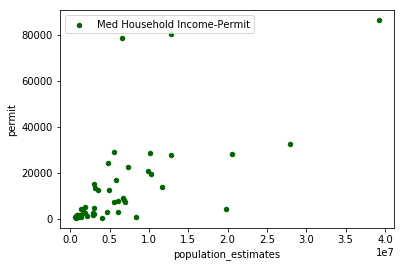

In [48]:
df_3.query('permit < 281051.083333 & permit!=0').plot.scatter(x='population_estimates', y='permit', color='DarkGreen', label='Med Household Income-Permit');

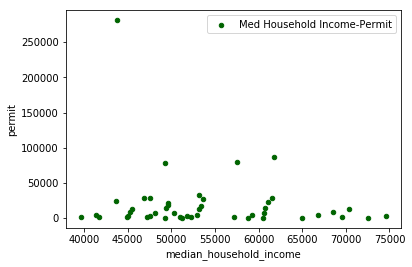

In [49]:
df_3.query('permit != 0').plot.scatter(x='median_household_income', y='permit', color='DarkGreen', label='Med Household Income-Permit');

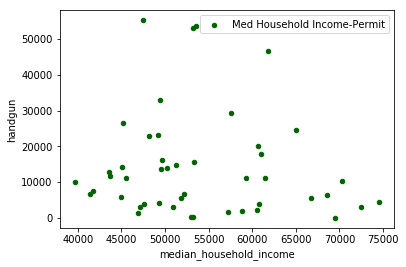

In [50]:
df_3.query('permit != 0').plot.scatter(x='median_household_income', y='handgun', color='DarkGreen', label='Med Household Income-Permit');

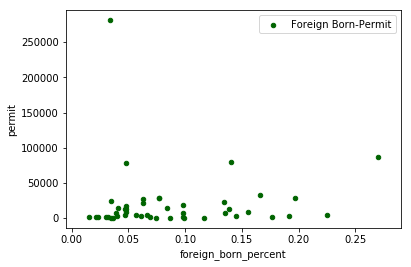

In [51]:
df_3.query('permit != 0').plot.scatter(x='foreign_born_percent', y='permit', color='DarkGreen', label='Foreign Born-Permit');

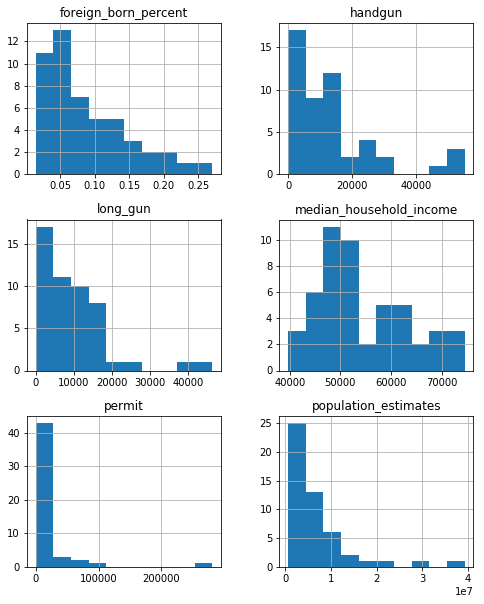

In [52]:
df_3.hist(figsize=(8,10));

### The permits column seems to have a few states with zero permits issued. Since I observed earlier that there is a correlation between the population and the number of permits, I will use those numbers to create a coefficient to multiply by the population and reaplace the zeros in the permit column.

In [53]:
coeff = df_3.query('permit!=0 & permit<281051.083333').permit.mean()/df_3.query('permit!=0 & permit<281051.083333').population_estimates.mean()

In [54]:
zero_vals = df_3.query('permit==0').population_estimates*coeff

In [55]:
zero_vals

29    19063.236901
35     8362.237360
38     2251.547756
44     1331.189519
Name: population_estimates, dtype: float64

In [56]:
df_3.permit.replace(0,zero_vals, inplace=True)

In [57]:
df_3.query('permit == 0')

,state,population_estimates,foreign_born_percent,median_household_income,permit,handgun,long_gun


In [58]:
df_3.query('handgun == 0|long_gun==0')

,state,population_estimates,foreign_born_percent,median_household_income,permit,handgun,long_gun
10,Hawaii,1428557.0,0.177,69515.0,1385.583333,0.0,0.0


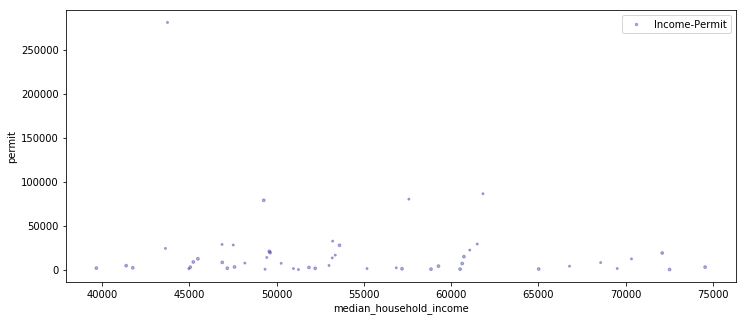

In [59]:
df_3.plot.scatter(x='median_household_income', y='permit', color='DarkBlue', s=[4,8], label='Income-Permit', alpha=0.3, figsize=(12, 5))

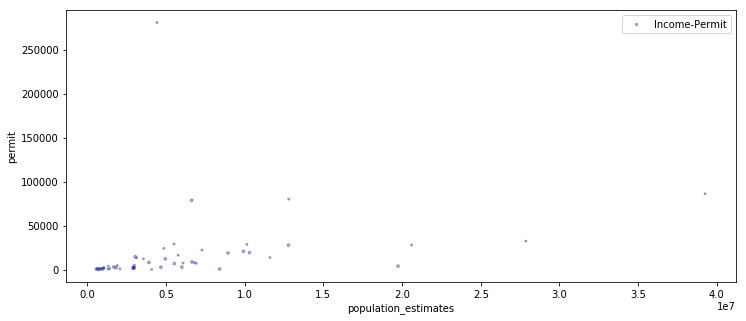

In [60]:
df_3.query('permit!=0').plot.scatter(x='population_estimates', y='permit', color='DarkBlue', s=[4,8], label='Income-Permit', alpha=0.3, figsize=(12, 5))

In [61]:
df_4 = df_3.copy() # the next two lines will be used to change the data in the first two columns from quantitative to categorical.

In [62]:
df_4["foreign_born_high_low"] = np.where(df_4['foreign_born_percent']>0.067500, 'high', 'low') 

In [63]:
df_4["median_household_income_high_low"] = np.where(df_4['median_household_income']>52601.0, 'high', 'low')

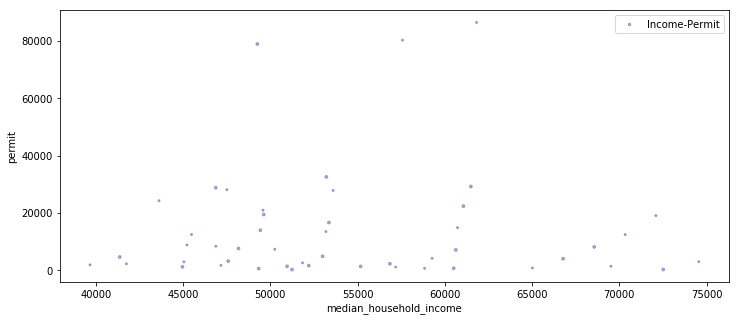

In [64]:
df_4.query('permit < 281051.083333').plot.scatter(x='median_household_income', y='permit', color='DarkBlue', s=[4,8], label='Income-Permit', alpha=0.3, figsize=(12, 5));

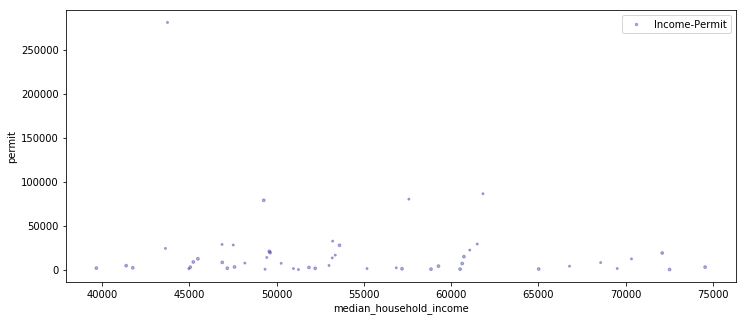

In [65]:
df_4.plot.scatter(x='median_household_income', y='permit', color='DarkBlue', s=[4,8], label='Income-Permit', alpha=0.3, figsize=(12, 5));


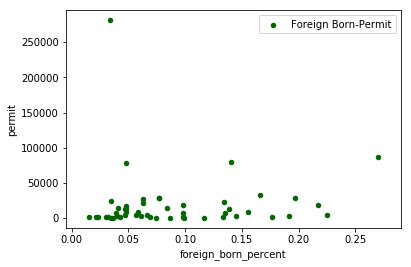

In [66]:
df_4.plot.scatter(x='foreign_born_percent', y='permit', color='DarkGreen', label='Foreign Born-Permit');

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Do states with higher median household income have a higher rate of permits issued?

In [67]:
df_4.query('median_household_income_high_low == "high"')['permit'].mean()

15790.908967038225

In [68]:
df_4.query('median_household_income_high_low == "low"')['permit'].mean()

22561.91282773227

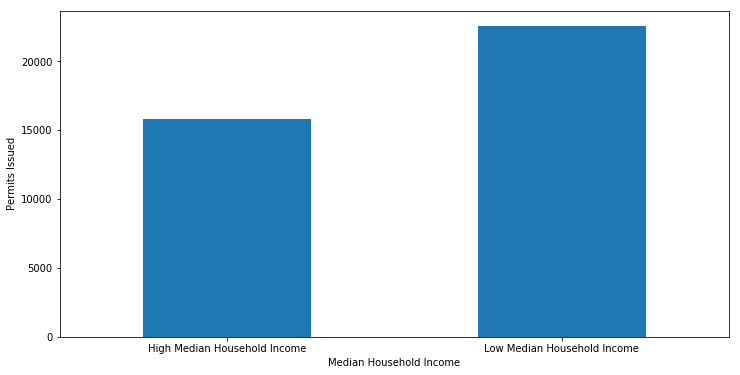

In [69]:
df_4.groupby('median_household_income_high_low')['permit'].mean().plot(kind='bar', figsize=(12,6))
labels = ['High Median Household Income', 'Low Median Household Income']
plt.ylabel('Permits Issued')
plt.xlabel('Median Household Income')
plt.xticks(np.arange(2), labels, rotation='horizontal');

### Research Question 2 : Do states with higher rates of foreigners have a higher rate of permits issued?

In [70]:
df_4.query('foreign_born_high_low == "high"')['permit'].mean()

16563.668052932066

In [71]:
df_4.query('foreign_born_high_low == "low"')['permit'].mean()

21789.15374183843

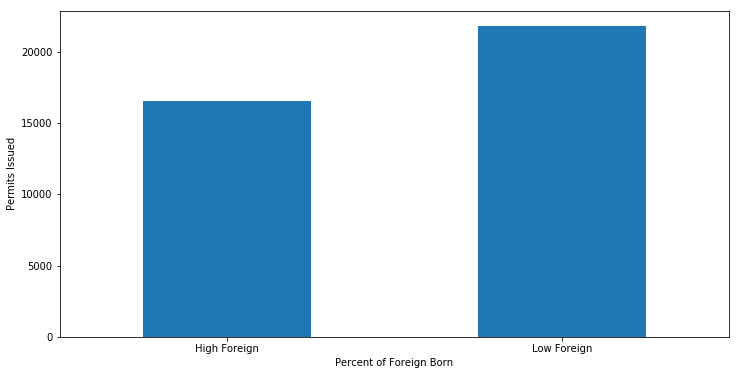

In [72]:
df_4.groupby('foreign_born_high_low')['permit'].mean().plot(kind='bar',figsize=(12,6))
labels = ['High Foreign', 'Low Foreign']
plt.ylabel('Permits Issued')
plt.xlabel('Percent of Foreign Born')
plt.xticks(np.arange(2), labels, rotation='horizontal');

### Research Question 3 : Do states with higher rates of foreigners and higher median household incomes, have a higher rate of permits?

In [73]:
df_4.query('foreign_born_high_low == "high" & median_household_income_high_low == "high"')['permit'].mean()

19109.60988176284

In [74]:
df_4.query('foreign_born_high_low == "low" & median_household_income_high_low =="low"')['permit'].mean()

27930.558079998435

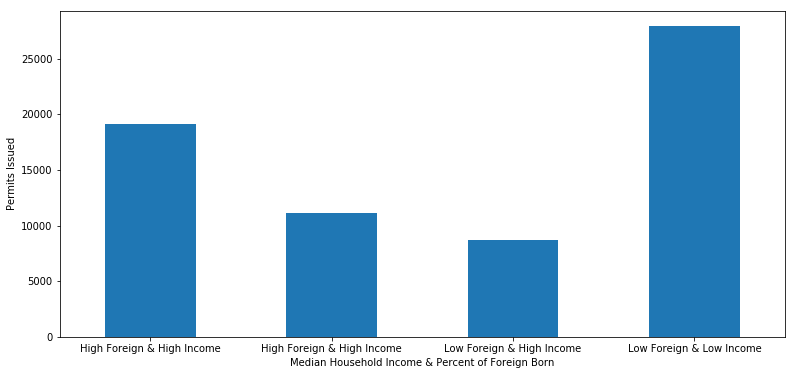

In [75]:
df_4.groupby(['foreign_born_high_low' , 'median_household_income_high_low'])['permit'].mean().plot(kind='bar', figsize=(13,6))
labels = ['High Foreign & High Income', 'High Foreign & High Income', 'Low Foreign & High Income', 'Low Foreign & Low Income']
plt.ylabel('Permits Issued')
plt.xlabel('Median Household Income & Percent of Foreign Born')
plt.xticks(np.arange(4), labels, rotation='horizontal');

### Research Question 3 : Is there a higher amount of handguns and long guns in states with higher median household income?

In [76]:
df_4.groupby('median_household_income_high_low').agg({'handgun':'sum', 'long_gun':'sum'})

,handgun,long_gun
median_household_income_high_low,,
high,331510.500000,244033.083333
low,341033.583333,254743.083333


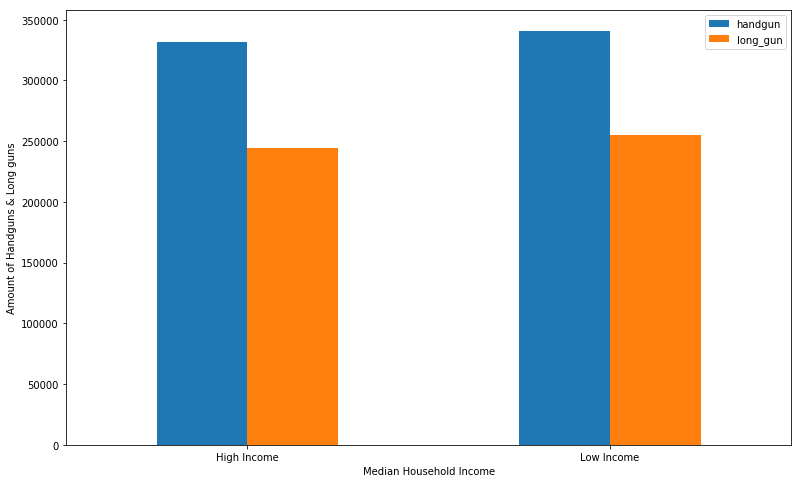

In [77]:
df_4.groupby('median_household_income_high_low').agg({'handgun':'sum', 'long_gun':'sum'}).plot(kind='bar', figsize=(13,8))
labels = ['High Income', 'Low Income']
plt.ylabel('Amount of Handguns & Long guns')
plt.xlabel('Median Household Income')
plt.xticks(np.arange(2), labels, rotation='horizontal');

<a id='conclusions'></a>
## Conclusions

>**The answer to the questions posted in the beginning of our data exploration project, can be answered by looking at the information in the Exploratory Data Analysis section.**

>- The first question appears to be that it is not true, in higher average household income states, there is a smaller amount of permits issued, conversely, in lower average household income states, there seems to be a higher amount of permits issued.
>- The second question appears to be that it is not true, states with higher percent of foreign born people, appear to have a smaller amount of permits issued, conversely, in states with lower percent of foreign born people, there seems to be a higher amount of permits issued.
>- The final question can be answered by looking at the final graph. By far it can be concluded that in states with lower average household income and lower percent of foreign born people, is where the highest amount of permits were issued.
>- Lastly there seems to be almost no difference between the number of handguns and long guns found in states with higher or lower median household incomes. There is a slightly higher concentration of guns in states with lower median household income than those found in higher median household income.
>- Something that must be noted, is that this are just observations, and do not represent an accurate correlation or prediction of any kind, due to the fact that there was no use of statistical regressions made on our sample data.